### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:
import pandas as pd
df = pd.read_csv("data/drugLibTrain_raw.tsv", sep='\t')

### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [2]:
df= df[['rating', 'effectiveness', 'sideEffects' ]]

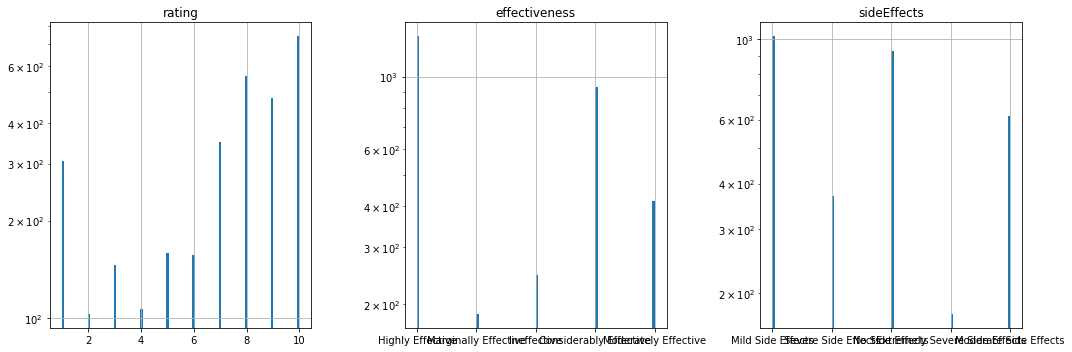

In [3]:
import matplotlib.pyplot as plt
#we can see in all variables except for years and stars that the frequency of 0 es huge
figure = plt.figure(figsize=(15,5))

for n, c in enumerate(df.columns):
  ax = figure.add_subplot(1,3,n+1)
  ax.set_title(c)
  ax.set_yscale("log") #the log scale help us to have a better idea of our data when the distribution is not fair
  df[c].hist(ax=ax, bins=100)

figure.tight_layout() #this feature separate the graphs correctly
plt.show()

#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [4]:
df = pd.get_dummies(df, columns = ['effectiveness', 'sideEffects'])

#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

In [30]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df) for k in range(1, 20)]

In [31]:
# Desde k = 2
silhouette_scores = [silhouette_score(df, model.labels_) for model in kmeans_per_k[1:]]

#### Muestra en un grafico de lineas los distintos coeficientes de Silhouette

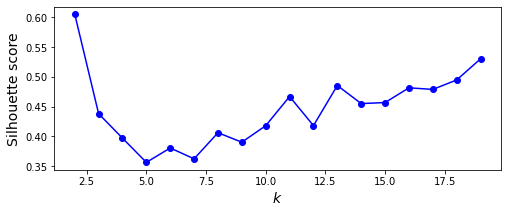

In [32]:
# k=2 parece que es el que más sentido tiene
plt.figure(figsize=(8, 3))
plt.plot(range(2, 20), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

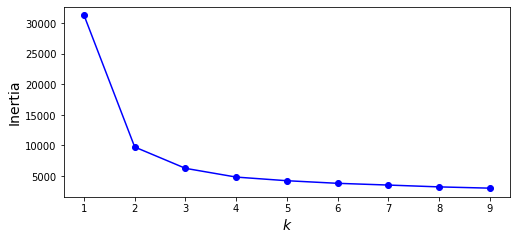

In [35]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14);

In [36]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(df)

#### Muestra un scatter plot siendo el color de cada punto el cluster al que pertenece

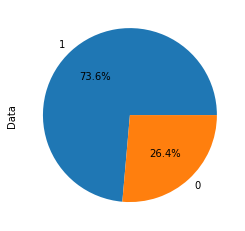

In [46]:
import pandas as pd
df = pd.DataFrame({'Data': kmeans.labels_})
df['Data'].value_counts().plot.pie(autopct="%.1f%%");

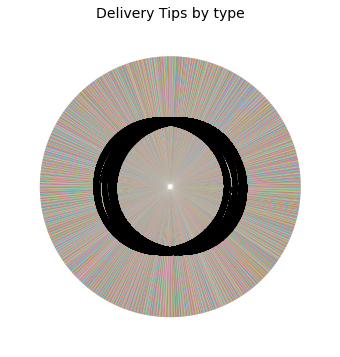

In [38]:
import matplotlib.pyplot as plt
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=kmeans.labels_, autopct="%.1f%%", pctdistance=0.5)
plt.title("Delivery Tips by type", fontsize=14);

In [ ]:
data.plot.pie(autopct="%.1f%%");

In [8]:
df.columns

Index(['rating', 'effectiveness_Considerably Effective',
       'effectiveness_Highly Effective', 'effectiveness_Ineffective',
       'effectiveness_Marginally Effective',
       'effectiveness_Moderately Effective',
       'sideEffects_Extremely Severe Side Effects',
       'sideEffects_Mild Side Effects', 'sideEffects_Moderate Side Effects',
       'sideEffects_No Side Effects', 'sideEffects_Severe Side Effects'],
      dtype='object')

AttributeError: 'DataFrame' object has no attribute 'effectiveness'

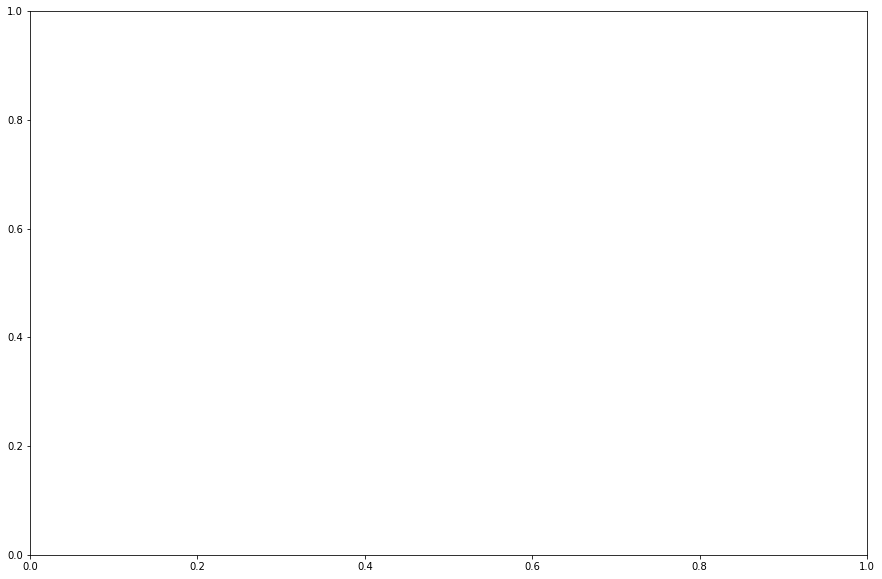

In [9]:
fig, ax = plt.subplots(figsize=(15,10))

scatter = ax.scatter(df.effectiveness, df.rating, c=labels)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)